<a href="https://colab.research.google.com/github/minghsu0107/ML/blob/master/machine-learning/xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Play with Iris Dataset

In [167]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
X.shape

(150, 4)

In [199]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((120, 4), (120,))

In [0]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

If you want to use svmlight for less memory consumption, first dump the numpy array into svmlight format and then just pass the filename to DMatrix:

In [0]:
from sklearn.datasets import dump_svmlight_file

dump_svmlight_file(X_train, y_train, 'dtrain.svm', zero_based=True)
dump_svmlight_file(X_test, y_test, 'dtest.svm', zero_based=True)
dtrain_svm = xgb.DMatrix('dtrain.svm')
dtest_svm = xgb.DMatrix('dtest.svm')

[02:44:26] 120x4 matrix with 480 entries loaded from dtrain.svm
[02:44:26] 30x4 matrix with 120 entries loaded from dtest.svm


Generally try with eta 0.1, 0.2, 0.3, max_depth in range of 2 to 10 and num_round around few hundred.

In [0]:
param = {
    'booster': 'gbtree',
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

In [0]:
bst = xgb.train(param, dtrain_svm, num_round)

In [0]:
bst.dump_model('dump.raw.txt')

In [251]:
import numpy as np

preds = bst.predict(dtest)
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [0]:
from sklearn.metrics import precision_score

print(precision_score(y_test, best_preds, average='macro'))

1.0


We  can save the model for further usage.

In [0]:
bst.save_model('iris_bst.model')

In [0]:
clf = xgb.Booster()
clf.load_model('iris_bst.model')

In [0]:
clf.predict(dtest)

array([[0.00563804, 0.97755206, 0.01680986],
       [0.98254657, 0.01395846, 0.00349498],
       [0.0036375 , 0.00615226, 0.9902103 ],
       [0.00564738, 0.97917044, 0.0151822 ],
       [0.00540075, 0.93640935, 0.0581899 ],
       [0.98607963, 0.0104128 , 0.00350755],
       [0.00438964, 0.99041265, 0.0051977 ],
       [0.0156953 , 0.06653062, 0.91777414],
       [0.0063378 , 0.94877166, 0.04489056],
       [0.00438964, 0.99041265, 0.0051977 ],
       [0.01785045, 0.07566603, 0.9064836 ],
       [0.99054164, 0.00561866, 0.00383973],
       [0.98254657, 0.01395846, 0.00349498],
       [0.990855  , 0.00562044, 0.00352453],
       [0.990855  , 0.00562044, 0.00352453],
       [0.00435676, 0.9863815 , 0.00926175],
       [0.0028351 , 0.00545694, 0.991708  ],
       [0.00506935, 0.98753244, 0.00739827],
       [0.00435527, 0.98265946, 0.01298527],
       [0.00283684, 0.00484793, 0.9923152 ],
       [0.990855  , 0.00562044, 0.00352453],
       [0.01177546, 0.08546326, 0.90276134],
       [0.

{'f2': 91, 'f3': 44, 'f0': 19, 'f1': 18}


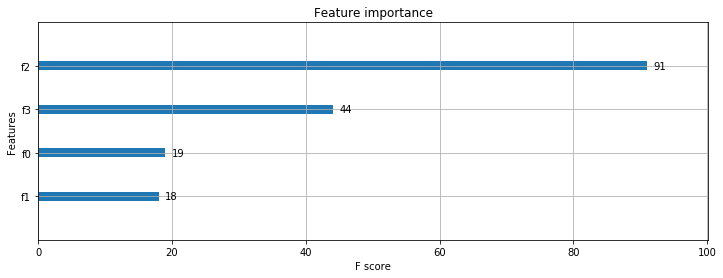

In [248]:
from xgboost import plot_importance
print(clf.get_fscore())
plot_importance(clf)

In [246]:
dir(clf)

['__class__',
 '__copy__',
 '__deepcopy__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_validate_features',
 'attr',
 'attributes',
 'boost',
 'booster',
 'copy',
 'dump_model',
 'eval',
 'eval_set',
 'feature_names',
 'feature_types',
 'get_dump',
 'get_fscore',
 'get_score',
 'get_split_value_histogram',
 'handle',
 'load_model',
 'load_rabit_checkpoint',
 'predict',
 'save_model',
 'save_rabit_checkpoint',
 'save_raw',
 'set_attr',
 'set_param',
 'trees_to_dataframe',
 'update']

We can also continue training on the existed model.

In [0]:
bst = xgb.train(param, dtest, num_round, xgb_model='iris_bst.model')

In [0]:
bst.predict(dtest)

array([[0.00626042, 0.97150415, 0.02223538],
       [0.9833303 , 0.01250299, 0.00416675],
       [0.00305996, 0.00463209, 0.9923079 ],
       [0.00627413, 0.9736327 , 0.02009312],
       [0.00591656, 0.9181438 , 0.07593963],
       [0.98649627, 0.00932354, 0.00418016],
       [0.0048936 , 0.98820364, 0.00690268],
       [0.01343146, 0.05095716, 0.93561137],
       [0.00697244, 0.93419635, 0.05883117],
       [0.0048936 , 0.98820364, 0.00690268],
       [0.01531663, 0.05810924, 0.9265741 ],
       [0.9903985 , 0.00502806, 0.00457345],
       [0.9833303 , 0.01250299, 0.00416675],
       [0.9907718 , 0.00502995, 0.00419828],
       [0.9907718 , 0.00502995, 0.00419828],
       [0.00485046, 0.9828661 , 0.01228339],
       [0.00238424, 0.00410734, 0.99350846],
       [0.0056468 , 0.984536  , 0.00981717],
       [0.00484286, 0.97795653, 0.01720059],
       [0.00238534, 0.0036484 , 0.9939663 ],
       [0.9907718 , 0.00502995, 0.00419828],
       [0.01011908, 0.06573138, 0.9241496 ],
       [0.

## Incremental Training

In [0]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error as mae

In [0]:
boston = load_boston()
features = boston.feature_names
X = boston.data
y = boston.target

X=pd.DataFrame(X,columns=features)
y = pd.Series(y, index=X.index)

# split data into training and testing sets
# n_splits = 1: split for one time
rs = ShuffleSplit(test_size=0.3, n_splits=1, random_state=10)
for train_idx, test_idx in rs.split(X):  # this looks silly
    pass

train_split = round(len(train_idx) / 2)
train1_idx = train_idx[:train_split]
train2_idx = train_idx[train_split:]

X_train = X.loc[train_idx]
X_train_1 = X.loc[train1_idx]
X_train_2 = X.loc[train2_idx]
X_test = X.loc[test_idx]

y_train = y.loc[train_idx]
y_train_1 = y.loc[train1_idx]
y_train_2 = y.loc[train2_idx]
y_test = y.loc[test_idx]

In [0]:
xg_train_0 = xgb.DMatrix(X_train, label=y_train)
xg_train_1 = xgb.DMatrix(X_train_1, label=y_train_1)
xg_train_2 = xgb.DMatrix(X_train_2, label=y_train_2)
xg_test = xgb.DMatrix(X_test, label=y_test)

params = {'objective': 'reg:linear', 'verbose': False}
model_0 = xgb.train(params, xg_train_0, 30)
model_1 = xgb.train(params, xg_train_1, 30)
model_1.save_model('model_1.model')
model_2_v1 = xgb.train(params, xg_train_2, 30)
model_2_v2 = xgb.train(params, xg_train_2, 30, xgb_model=model_1)

params.update({'process_type': 'update',
               'updater'     : 'refresh',
               'refresh_leaf': True})
model_2_v2_update = xgb.train(params, xg_train_2, 30, xgb_model=model_1)

print('full train\t',mae(model_0.predict(xg_test), y_test)) # benchmark
print('model 1 \t',mae(model_1.predict(xg_test), y_test))  
print('model 2 \t',mae(model_2_v1.predict(xg_test), y_test))  # "before"
print('model 1+2\t',mae(model_2_v2.predict(xg_test), y_test))  # "after"
print('model 1+update2\t',mae(model_2_v2_update.predict(xg_test), y_test))  # "after"

[02:44:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:44:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:44:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:44:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:44:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:44:26] WARNING: /workspace/src/learner.cc:194: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
full train	 2.548246261320616
model 1 	 3.098096799850464
model 2 	 2.617

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


## XGB Test

### Prepare data

In [0]:
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [0]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Get number of boosters by CV

xgb.cv performs cross-validation at each boosting iteration and thus returns the optimum number of trees required.

In [271]:
xgb1 = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'multi:softprob',
    num_class=3,
    nthread=4,
    scale_pos_weight=1,
    seed=27)

dtrain = xgb.DMatrix(X_train, label=y_train)
xgb_param = xgb1.get_xgb_params()
cvresult = xgb.cv(xgb_param, dtrain, 
                  num_boost_round = xgb1.get_params()['n_estimators'], 
                  nfold=5,
                  metrics='mlogloss',
                  early_stopping_rounds=50, 
                  stratified=True)

cvresult

,train-mlogloss-mean,train-mlogloss-std,test-mlogloss-mean,test-mlogloss-std
0,0.977897,0.002407,0.984724,0.009450
1,0.872988,0.003070,0.886396,0.012001
2,0.785642,0.003654,0.800829,0.010647
3,0.708423,0.005110,0.725151,0.011139
4,0.641874,0.006151,0.662517,0.011975
5,0.582477,0.006543,0.608077,0.013172
6,0.530642,0.006694,0.562257,0.016395
7,0.484445,0.006883,0.520560,0.020744
8,0.443772,0.006678,0.483261,0.020576
9,0.407615,0.007206,0.451485,0.022554


In [316]:
print(cvresult.shape)
xgb1.set_params(n_estimators=cvresult.shape[0])

from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb1, X_train, y_train, cv=5)

print("Accuracy of cross validation(train): %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(xgb1, X_test, y_test, cv=5)
print("Accuracy of cross validation(test): %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

(72, 4)
Accuracy of cross validation(train): 0.9583 (+/- 0.09)
Accuracy of cross validation(test): 0.9048 (+/- 0.16)


[0.02989605 0.04874194 0.51202303 0.409339  ]
{'f2': 174, 'f3': 110, 'f0': 53, 'f1': 60}
{'f2': 174, 'f3': 110, 'f0': 53, 'f1': 60}


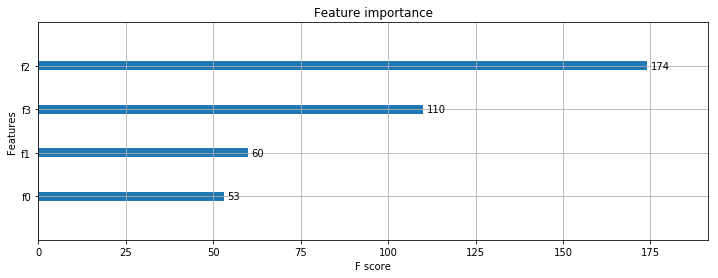

In [261]:
print(xgb1.feature_importances_)
print(xgb1.get_booster().get_fscore())

# importance_type = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
print(xgb1.get_booster().get_score(importance_type='weight'))

from xgboost import plot_importance
plot_importance(xgb1)

### Tuning

In [174]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

If a best param is on the boundary of the testing interval, we should try another interval to cover it. 

In [264]:
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)}

gsearch1 = GridSearchCV(estimator = XGBClassifier(
    learning_rate=0.1, n_estimators=41, max_depth=5,
    min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
    objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27), 
    param_grid = param_test1, scoring='accuracy', n_jobs=4, iid=False, cv=5)

gsearch1.fit(X_train, y_train)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 1}, 0.9499710144927537)

In [268]:
param_test2 = {
    'max_depth':[1, 2, 3, 4],
    'min_child_weight':[1, 2, 3]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(
    learning_rate=0.1, n_estimators=41, max_depth=3,
    min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
    objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27), 
    param_grid = param_test2, scoring='accuracy', n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train, y_train)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 1, 'min_child_weight': 1}, 0.9583043478260869)

In [270]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(
    learning_rate=0.1, n_estimators=41, max_depth=1,
    min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
    objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27), 
    param_grid = param_test3, scoring='accuracy', n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train, y_train)
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.0}, 0.9583043478260869)

Before proceeding, a good idea would be to re-calibrate the number of boosting rounds for the updated parameters.

In [317]:
xgb2 = XGBClassifier(
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=1,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'multi:softprob',
    num_class=3,
    nthread=4,
    scale_pos_weight=1,
    seed=27)

dtrain = xgb.DMatrix(X_train, label=y_train)
xgb_param = xgb2.get_xgb_params()
cvresult = xgb.cv(xgb_param, dtrain, 
                  num_boost_round = xgb1.get_params()['n_estimators'], 
                  nfold=5,
                  metrics='mlogloss',
                  early_stopping_rounds=50, 
                  stratified=True)

print("best number of boosting rounds: ", cvresult.shape[0])
xgb2.set_params(n_estimators=cvresult.shape[0])

from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb2, X_train, y_train, cv=5)
print("Accuracy of cross validation(train): %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(xgb2, X_test, y_test, cv=5)
print("Accuracy of cross validation(test): %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

best number of boosting rounds:  72
Accuracy of cross validation(train): 0.9583 (+/- 0.09)
Accuracy of cross validation(test): 0.9048 (+/- 0.16)


In [277]:
param_test4 = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier(
    learning_rate=0.1, n_estimators=72, max_depth=1,
    min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
    objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27), 
    param_grid = param_test4, scoring='accuracy', n_jobs=4,iid=False, cv=5)

gsearch4.fit(X_train, y_train)
gsearch4.best_params_, gsearch2.best_score_

({'colsample_bytree': 0.6, 'subsample': 0.6}, 0.9583043478260869)

In [281]:
param_test5 = {
    'subsample':[i/100.0 for i in range(55,65,5)],
    'colsample_bytree':[i/100.0 for i in range(55,65,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier(
    learning_rate=0.1, n_estimators=72, max_depth=1,
    min_child_weight=1, gamma=0, subsample=0.6, colsample_bytree=0.6,
    objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27), 
    param_grid = param_test5, scoring='accuracy', n_jobs=4,iid=False, cv=5)

gsearch5.fit(X_train, y_train)
gsearch5.best_params_, gsearch5.best_score_

({'colsample_bytree': 0.55, 'subsample': 0.6}, 0.9583043478260869)

Tuning Regularization Parameters

In [296]:
param_test6 = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
    'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100]
}

gsearch6 = GridSearchCV(estimator = XGBClassifier(
    learning_rate=0.1, n_estimators=72, max_depth=1,
    min_child_weight=1, gamma=0, subsample=0.6, colsample_bytree=0.55,
    objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27), 
    param_grid = param_test6, scoring='accuracy', n_jobs=4,iid=False, cv=5)

gsearch6.fit(X_train, y_train)
gsearch6.best_params_, gsearch6.best_score_

({'reg_alpha': 1e-05, 'reg_lambda': 1e-05}, 0.9663043478260869)

In [298]:
param_test7 = {
    'reg_alpha':[0, 1e-6, 5*1e-6, 1e-5, 5*1e-5],
    'reg_lambda':[0, 1e-6, 5*1e-6, 1e-5, 5*1e-5]
}

gsearch7 = GridSearchCV(estimator = XGBClassifier(
    learning_rate=0.1, n_estimators=72, max_depth=1,
    min_child_weight=1, gamma=0, subsample=0.6, colsample_bytree=0.55,
    objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27), 
    param_grid = param_test7, scoring='accuracy', n_jobs=4,iid=False, cv=5)

gsearch7.fit(X_train, y_train)
gsearch7.best_params_, gsearch7.best_score_

({'reg_alpha': 0, 'reg_lambda': 0}, 0.9663043478260869)

In [319]:
xgb3 = XGBClassifier(
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=1,
    min_child_weight=1,
    gamma=0,
    subsample=0.6,
    colsample_bytree=0.55,
    reg_alpha=0,
    reg_lambda=0,
    objective= 'multi:softprob',
    num_class=3,
    nthread=4,
    scale_pos_weight=1,
    seed=27)

dtrain = xgb.DMatrix(X_train, label=y_train)
xgb_param = xgb3.get_xgb_params()
cvresult = xgb.cv(xgb_param, dtrain, 
                  num_boost_round = xgb1.get_params()['n_estimators'], 
                  nfold=5,
                  metrics='mlogloss',
                  early_stopping_rounds=50, 
                  stratified=True)

print("best number of boosting rounds: ", cvresult.shape[0])
xgb3.set_params(n_estimators=cvresult.shape[0])

from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb3, X_train, y_train, cv=5)
print("Accuracy of cross validation(train): %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(xgb3, X_test, y_test, cv=5)
print("Accuracy of cross validation(test): %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

best number of boosting rounds:  72
Accuracy of cross validation(train): 0.9663 (+/- 0.10)
Accuracy of cross validation(test): 0.9667 (+/- 0.13)


Reducing Learning Rate

In [342]:
final_params = {
    'learning_rate': 0.08,
    'n_estimators': 1000,
    'max_depth': 1,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.6,
    'colsample_bytree': 0.55,
    'reg_alpha': 0,
    'reg_lambda': 0,
    'objective': 'multi:softprob',
    'num_class': 3,
    'nthread': 4,
    'scale_pos_weight': 1,
    'seed': 27 }

xgb4 = XGBClassifier(**final_params)

dtrain = xgb.DMatrix(X_train, label=y_train)
xgb_param = xgb4.get_xgb_params()
cvresult = xgb.cv(xgb_param, dtrain, 
                  num_boost_round = xgb1.get_params()['n_estimators'], 
                  nfold=5,
                  metrics='mlogloss',
                  early_stopping_rounds=50, 
                  stratified=True)

print("best number of boosting rounds: ", cvresult.shape[0])
xgb4.set_params(n_estimators=cvresult.shape[0])

from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb4, X_train, y_train, cv=5)
print("Accuracy of cross validation(train): %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(xgb4, X_test, y_test, cv=5)
print("Accuracy of cross validation(test): %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

best number of boosting rounds:  72
Accuracy of cross validation(train): 0.9663 (+/- 0.10)
Accuracy of cross validation(test): 0.9667 (+/- 0.13)
